In [54]:
import pandas as pd
import itertools
import networkx as nx
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [301]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2))

In [302]:
def union(lst1, lst2): 
    return list(set(lst1) | set(lst2))

In [305]:
def jaccard(text_a, text_b):
    x = text_a.split(' ')
    y = text_b.split(' ')
    inter = intersection(x, y)
    uni = union(x, y)
    return len(inter)/len(uni)

In [193]:
def papers_from_idlist(list_papers):
    p = papers[papers['idpaper'].isin(list_papers)][['title', 'abstract']].drop_duplicates()
    p['joined'] = p['title'].str.cat(p['abstract'], sep=' ')
    return ' '.join(list(p['joined']))

In [194]:
papers_from_idlist(['704.0002'])

'sparsity-certifying graph decompositions we describe a new algorithm, the $(k,\\ell)$-pebble game with colors, and use it obtain a characterization of the family of $(k,\\ell)$-sparse graphs and algorithmic solutions to a family of problems concerning tree decompositions of graphs. special instances of sparse graphs appear in rigidity theory and have received increased attention in recent years. in particular, our colored pebbles generalize and strengthen the previous results of lee and streinu and give a new proof of the tutte-nash-williams characterization of arboricity. we also present a new decomposition that certifies sparsity based on the $(k,\\ell)$-pebble game with colors. our work also exposes connections between pebble game algorithms and previous sparse graph algorithms by gabow, gabow and westermann and hendrickson.'

In [187]:
papers = pd.read_json('../datasets/_papers.json')
len(papers)

2495

In [188]:
papers.head()

,abstract,area,authors,date_create,idpaper,title
0,"we describe a new algorithm, the $(k,\ell)$-pe...",math.co cs.cg,"[streinu, theran]",2007-03-30,704.0002,sparsity-certifying graph decompositions
1,"we describe a new algorithm, the $(k,\ell)$-pe...",math.co cs.cg,"[streinu, theran]",2007-03-30,704.0002,sparsity-certifying graph decompositions
2,"we describe a new algorithm, the $(k,\ell)$-pe...",math.co cs.cg,"[streinu, theran]",2007-03-30,704.0002,sparsity-certifying graph decompositions
3,"we describe a new algorithm, the $(k,\ell)$-pe...",math.co cs.cg,"[streinu, theran]",2007-03-30,704.0002,sparsity-certifying graph decompositions
4,"we describe a new algorithm, the $(k,\ell)$-pe...",math.co cs.cg,"[streinu, theran]",2007-03-30,704.0002,sparsity-certifying graph decompositions


In [2]:
base = pd.read_json('../datasets/_authors_paper.json')
len(base)

2495

In [3]:
base['date_create']=base['date_create'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

In [4]:
# base = base[base['date_create'] < '2009-01-01']
# len(base)

In [5]:
base.head()

,author_idauthor,date_create,idauthor_paper,paper_idpaper
0,aoz45xyz12,2007-03-30,auz35ppr2,704.0002
1,aoz26xyz17,2007-03-30,auz70ppr11,704.0002
2,aoz55xyz4,2007-03-30,auz40ppr10,704.0002
3,aoz21xyz6,2007-03-30,auz25ppr19,704.0002
4,aoz40xyz14,2007-03-30,auz5ppr20,704.0002


In [241]:
lista_autores = list(base['idauthor_paper'].drop_duplicates())

In [242]:
G = nx.Graph()

In [243]:
# para cada autor
for autor in lista_autores:
    # todos os papers do autor
    papers_autor = list(base[
        (base['idauthor_paper']==autor) & (base['date_create'] < '2007-05-01')
    ]['paper_idpaper'])
    G.add_node(
        autor,
        texts=papers_autor,
    )

In [244]:
# para cada autor
for autor in lista_autores:
    # todos os papers do autor
    papers_autor = list(base[base['idauthor_paper']==autor]['paper_idpaper'])
    # todos os coautores dos papers do autor
    coautores = list(base[
        (base['paper_idpaper'].isin(papers_autor)) & (base['date_create'] < '2007-05-01')
    ]['idauthor_paper'])
    combinacoes = itertools.combinations(coautores, 2)
    for comb in combinacoes:
        pessoa1 = comb[0]
        pessoa2 = comb[1]
        G.add_edge(pessoa1, pessoa2)

In [245]:
pos = nx.spring_layout(G)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


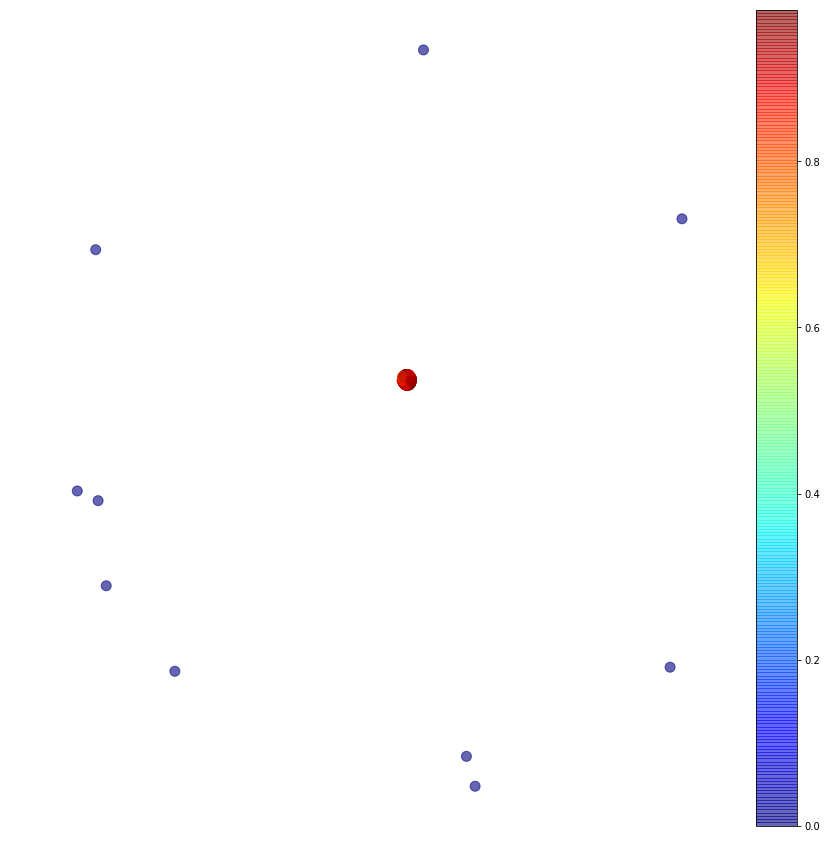

In [246]:
node_color = [cent for cent in nx.degree_centrality(G).values()]
node_size = [100 for node in G.nodes()]
plt.figure(figsize=(15,15))
ed = nx.draw_networkx_edges(G, pos=pos, alpha=0.3, edge_color='gray')
no = nx.draw_networkx_nodes(G, pos=pos, alpha=0.6, with_labels=False, node_color=node_color, 
                            cmap=cm.jet, vmin=min(list(nx.degree_centrality(G).values())), 
                            vmax=max(list(nx.degree_centrality(G).values())),
                            node_size=node_size)
plt.colorbar(no)
plt.axis('off')
plt.show()

In [247]:
length = nx.all_pairs_shortest_path_length(G)

In [248]:
distancias = [x for x in length]

In [249]:
authors_dist_2 = []
for a in distancias:
    p = a[0]
    c = a[1]
    for co,va in c.items():
        if va == 2:
            authors_dist_2.append([p, co])
print(authors_dist_2[:10])

[['auz40ppr10', 'auz40ppr4'], ['auz40ppr10', 'auz30ppr10'], ['auz40ppr10', 'auz100ppr20'], ['auz40ppr10', 'auz105ppr14'], ['auz40ppr10', 'auz5ppr7'], ['auz40ppr10', 'auz45ppr17'], ['auz40ppr10', 'auz55ppr1'], ['auz40ppr10', 'auz5ppr14'], ['auz40ppr10', 'auz45ppr10'], ['auz40ppr10', 'auz90ppr15']]


In [250]:
G_futuro = nx.Graph()

In [251]:
# para cada autor
for autor in lista_autores:
    # todos os papers do autor
    papers_autor = list(base[
        (base['idauthor_paper']==autor) & (base['date_create'] >= '2007-05-01')
    ]['paper_idpaper'])
    G_futuro.add_node(
        autor,
        texts=papers_autor,
    )

In [252]:
# para cada autor
for autor in lista_autores:
    # todos os papers do autor
    papers_autor = list(base[base['idauthor_paper']==autor]['paper_idpaper'])
    # todos os coautores dos papers do autor
    coautores = list(base[
        (base['paper_idpaper'].isin(papers_autor)) & (base['date_create'] >= '2007-05-01')
    ]['idauthor_paper'])
    combinacoes = itertools.combinations(coautores, 2)
    for comb in combinacoes:
        pessoa1 = comb[0]
        pessoa2 = comb[1]
        G_futuro.add_edge(pessoa1, pessoa2)

In [253]:
list(G_futuro.nodes())[:5]

['auz35ppr2', 'auz70ppr11', 'auz40ppr10', 'auz25ppr19', 'auz5ppr20']

In [254]:
pos = nx.spring_layout(G_futuro)

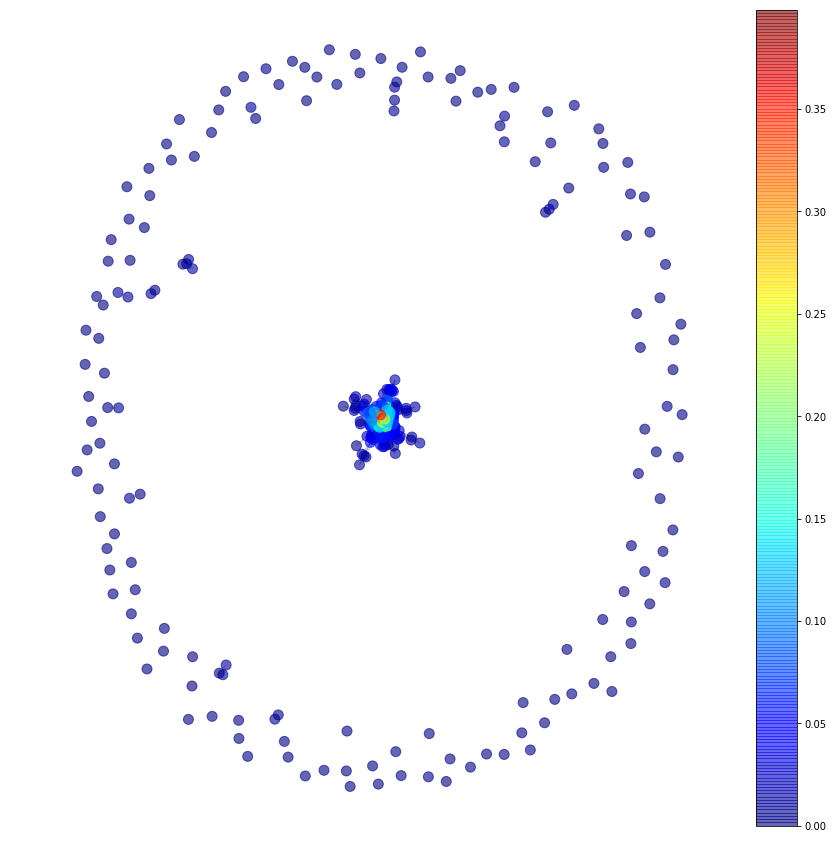

In [255]:
node_color = [cent for cent in nx.degree_centrality(G_futuro).values()]
node_size = [100 for node in G.nodes()]
plt.figure(figsize=(15,15))
ed = nx.draw_networkx_edges(G_futuro, pos=pos, alpha=0.3, edge_color='gray')
no = nx.draw_networkx_nodes(G_futuro, pos=pos, alpha=0.6, with_labels=False, node_color=node_color, 
                            cmap=cm.jet, vmin=min(list(nx.degree_centrality(G_futuro).values())), 
                            vmax=max(list(nx.degree_centrality(G_futuro).values())),
                            node_size=node_size)
plt.colorbar(no)
plt.axis('off')
plt.show()

In [256]:
ligacoes_futuras = pd.DataFrame(authors_dist_2, columns=['Author_1', 'Author_2'])

In [257]:
ligacoes_futuras.head()

,Author_1,Author_2
0,auz40ppr10,auz40ppr4
1,auz40ppr10,auz30ppr10
2,auz40ppr10,auz100ppr20
3,auz40ppr10,auz105ppr14
4,auz40ppr10,auz5ppr7


In [258]:
ligacoes_futuras['label'] = ligacoes_futuras.apply(
    lambda lig: G_futuro.has_edge(lig['Author_1'], lig['Author_2']) or 
    G_futuro.has_edge(lig['Author_2'], lig['Author_1']), axis=1)

In [265]:
ligacoes_futuras.head()

,Author_1,Author_2,label
0,auz40ppr10,auz40ppr4,False
1,auz40ppr10,auz30ppr10,False
2,auz40ppr10,auz100ppr20,False
3,auz40ppr10,auz105ppr14,False
4,auz40ppr10,auz5ppr7,False


In [259]:
len(ligacoes_futuras)

876

In [260]:
len(ligacoes_futuras[ligacoes_futuras['label'] == True])

92

In [279]:
base_author = pd.DataFrame()
base_author['author'] = pd.concat([ligacoes_futuras['Author_1'], ligacoes_futuras['Author_2']]).drop_duplicates()
base_author['texts'] = base_author['author'].apply(lambda x: papers_from_idlist(G.node[x]['texts']))
base_author.head()

,author,texts
0,auz40ppr10,sparsity-certifying graph decompositions we de...
10,auz5ppr20,sparsity-certifying graph decompositions we de...
12,auz85ppr14,sparsity-certifying graph decompositions we de...
17,auz40ppr2,sparsity-certifying graph decompositions we de...
20,auz20ppr14,sparsity-certifying graph decompositions we de...


In [298]:
texto_a = base_author[base_author['author']==ligacoes_futuras['Author_1'][1]]['texts'].values[0]

In [299]:
texto_b = base_author[base_author['author']==ligacoes_futuras['Author_2'][1]]['texts'].values[0]

In [308]:
jaccard(texto_a, texto_b)

0.0728744939271255

In [318]:
def calculo_jaccard(dupla):
    texto_a = base_author[base_author['author']==dupla['Author_1']]['texts'].values[0]
    texto_b = base_author[base_author['author']==dupla['Author_2']]['texts'].values[0]
    return jaccard(texto_a, texto_b)

In [319]:
ligacoes_futuras['jaccard'] = ligacoes_futuras.apply(calculo_jaccard, axis=1)

In [322]:
ligacoes_futuras[ligacoes_futuras['label']==True]

,Author_1,Author_2,label,jaccard
32,auz35ppr21,auz45ppr17,True,0.075676
47,auz50ppr14,auz50ppr13,True,0.083333
54,auz50ppr14,auz105ppr14,True,0.126866
57,auz50ppr14,auz55ppr1,True,0.084337
59,auz50ppr14,auz45ppr10,True,0.083333
60,auz45ppr3,auz5ppr14,True,0.087629
61,auz45ppr3,auz45ppr10,True,0.100000
96,auz60ppr3,auz100ppr20,True,0.094059
98,auz60ppr3,auz105ppr14,True,0.114458
101,auz60ppr3,auz55ppr1,True,0.086294
